# Cancer in America by County

## Kellen Neely CPT289-W01 Data Science II

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as geo
import matplotlib.pyplot as plt

In [2]:
cancer = pd.read_csv('cancer_reg.csv')
cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [4]:
counties = pd.read_csv('avg-household-size.csv')
counties.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [5]:
usa = geo.read_file('cb_2015_us_county_20m.shp')
usa['STATEFP'] = pd.to_numeric(usa['STATEFP'])
usa['COUNTYFP'] = pd.to_numeric(usa['COUNTYFP'])
usa.rename(columns={'COUNTYFP':'countyfips', 'STATEFP':'statefips'}, inplace=True)
usa.head()

,statefips,countyfips,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,20,175,00485050,0500000US20175,20175,Seward,06,1655865960,2777350,"POLYGON ((-101.0679 37.38778, -100.65273 37.38..."
1,28,141,00695791,0500000US28141,28141,Tishomingo,06,1098939230,52359814,"POLYGON ((-88.36353 34.99575, -88.25811 34.995..."
2,36,101,00974148,0500000US36101,36101,Steuben,06,3601566799,34993606,"POLYGON ((-77.72296 42.47122, -77.72062 42.535..."
3,50,13,01461763,0500000US50013,50013,Grand Isle,06,211894597,292303559,"POLYGON ((-73.38997 44.61962, -73.36556 44.700..."
4,5,65,00066860,0500000US05065,05065,Izard,06,1503685418,8912603,"POLYGON ((-92.2139 36.1751, -92.15986 36.17385..."


In [6]:
counties = counties.merge(usa[['statefips', 'countyfips', 'geometry']], on=['statefips', 'countyfips'], how='left')
counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   statefips         3220 non-null   int64   
 1   countyfips        3220 non-null   int64   
 2   avghouseholdsize  3220 non-null   float64 
 3   geography         3220 non-null   object  
 4   geometry          3220 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 125.9+ KB


In [7]:
cancer = cancer.merge(counties, on='geography', how='left')
cancer = geo.GeoDataFrame(cancer, geometry='geometry')

## What is the distribution of Cancer Incidence Rate?

In [8]:
cancer.incidencerate.describe()

count    3047.000000
mean      448.268586
std        54.560733
min       201.300000
25%       420.300000
50%       453.549422
75%       480.850000
max      1206.900000
Name: incidencerate, dtype: float64

Text(0.5, 0.98, 'Cancer Incidence Rate Histogram')

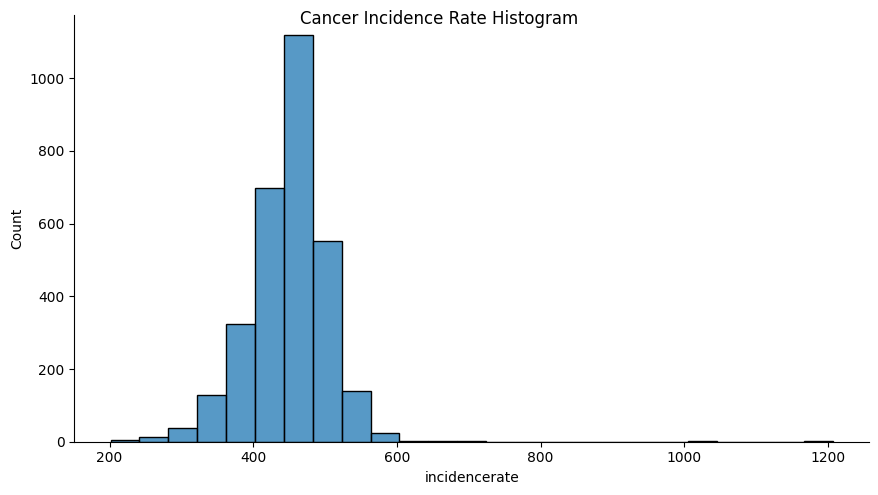

In [9]:
sns.displot(data=cancer, kind='hist', x='incidencerate', bins=25, aspect=16/9).fig.suptitle("Cancer Incidence Rate Histogram")

Text(0.5, 0.98, 'Cancer Incidence Rate Box Plot')

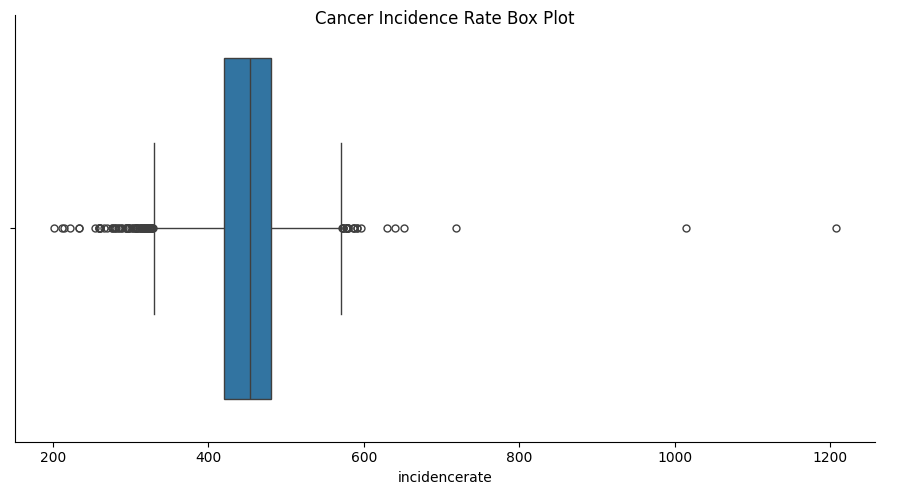

In [10]:
sns.catplot(data=cancer, kind='box', x='incidencerate', orient='h', aspect=16/9).fig.suptitle("Cancer Incidence Rate Box Plot")

In [11]:
cancer[['incidencerate', 'geography']].sort_values('incidencerate', ascending=False).head(6)

,incidencerate,geography
1489,1206.9,"Union County, Florida"
281,1014.2,"Williamsburg city, Virginia"
255,718.9,"Charlottesville city, Virginia"
270,651.3,"Petersburg city, Virginia"
1378,639.7,"Bracken County, Kentucky"
2597,630.4,"Powell County, Kentucky"


Text(0.5, 1.0, 'Cancer Incidence Rate Choropleth')

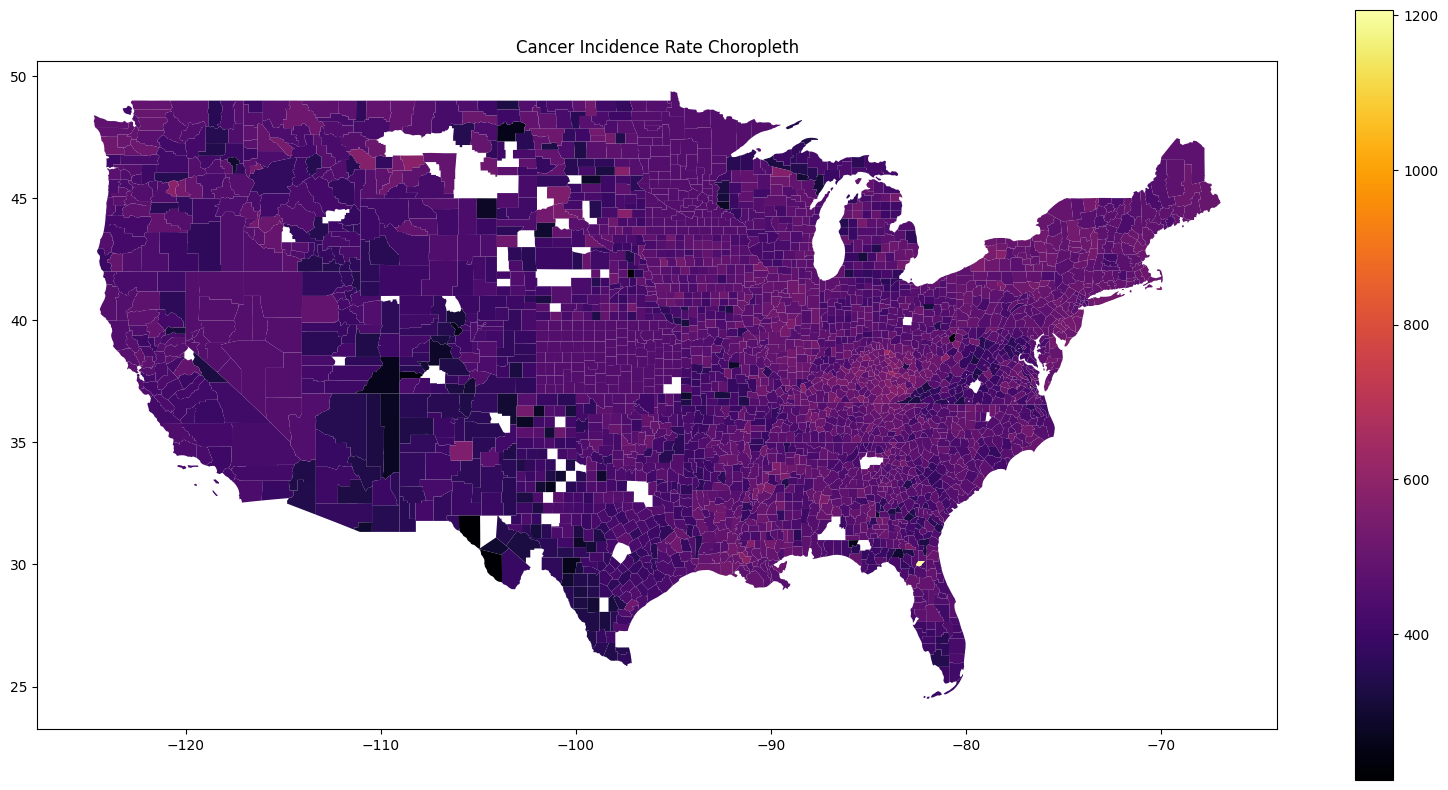

In [12]:
cancer.query("statefips not in [15,2,72]").plot(column='incidencerate', legend=True, figsize=(20,10), cmap='inferno').set_title('Cancer Incidence Rate Choropleth')

Text(0.5, 1.0, 'Cancer Incidence Rate (<1000) Choropleth')

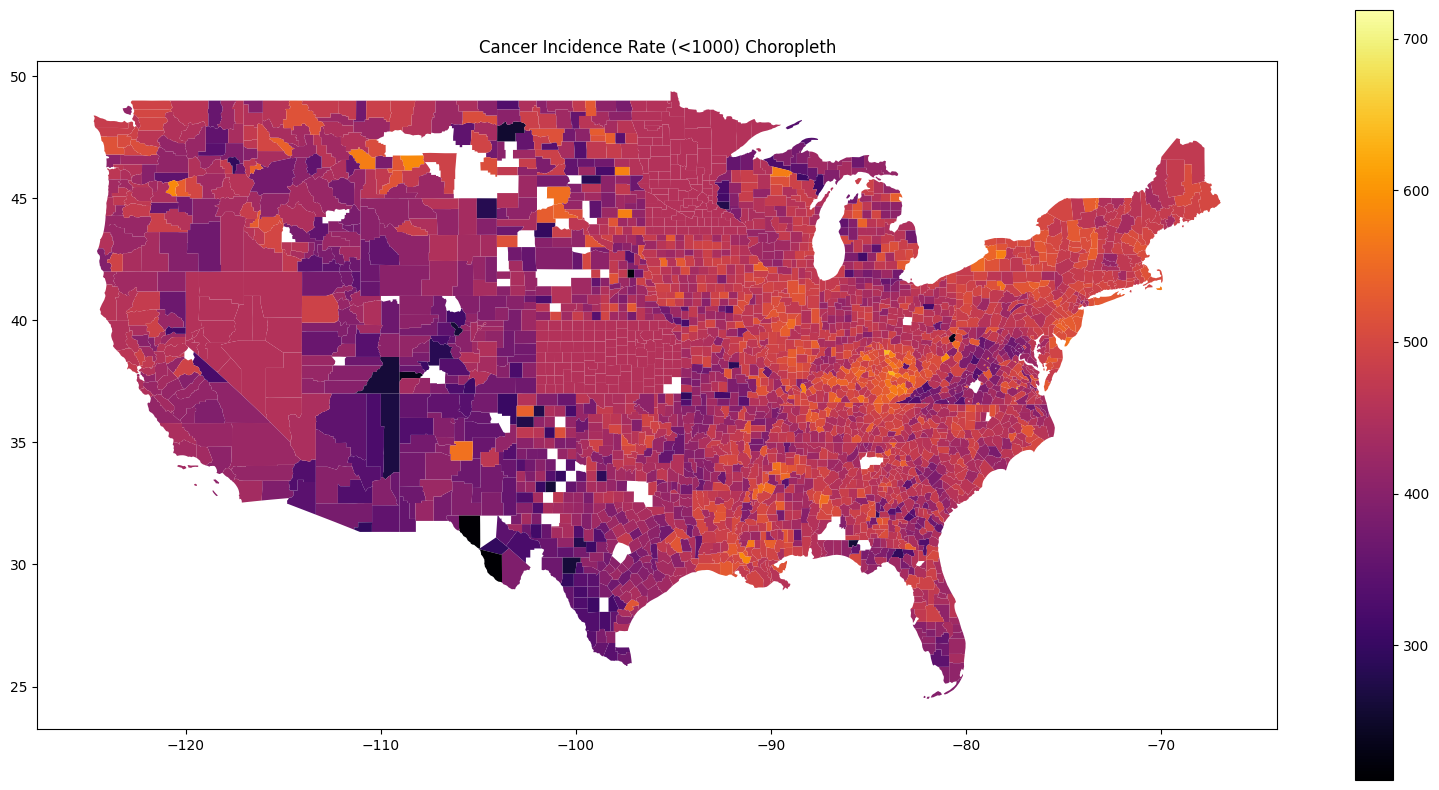

In [13]:
cancer.query("statefips not in [15,2,72] & incidencerate < 1000").plot(column='incidencerate', legend=True, figsize=(20,10), cmap='inferno').set_title('Cancer Incidence Rate (<1000) Choropleth')

## Are the Counties with the most cancer the deadliest? 

In [14]:
cancer['deathrate'] = cancer['avgdeathsperyear'] / cancer['popest2015']
cancer['deathrate'].describe()

count    3047.000000
mean        0.002287
std         0.000611
min         0.000485
25%         0.001888
50%         0.002290
75%         0.002681
max         0.005136
Name: deathrate, dtype: float64

Text(0.5, 0.98, 'Cancer Death Rate Histogram')

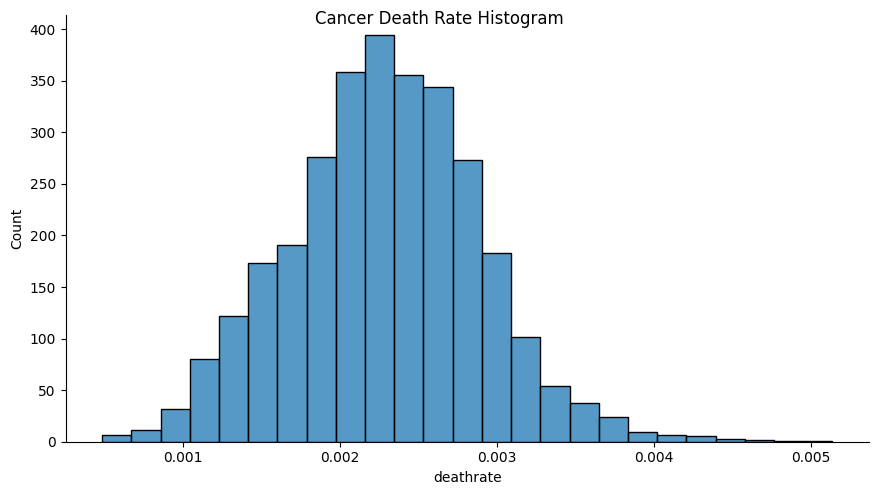

In [15]:
sns.displot(data=cancer, kind='hist', x='deathrate', bins=25, aspect=16/9).fig.suptitle("Cancer Death Rate Histogram")

In [16]:
cancer[['deathrate', 'geography']].sort_values('deathrate', ascending=False).head(6)

,deathrate,geography
1365,0.005136,"Woodson County, Kansas"
115,0.004825,"Esmeralda County, Nevada"
471,0.004754,"Griggs County, North Dakota"
3040,0.004607,"Elk County, Kansas"
1496,0.004513,"Cimarron County, Oklahoma"
121,0.004466,"Mineral County, Nevada"


Text(0.5, 1.0, 'Cancer Death Rate Choropleth')

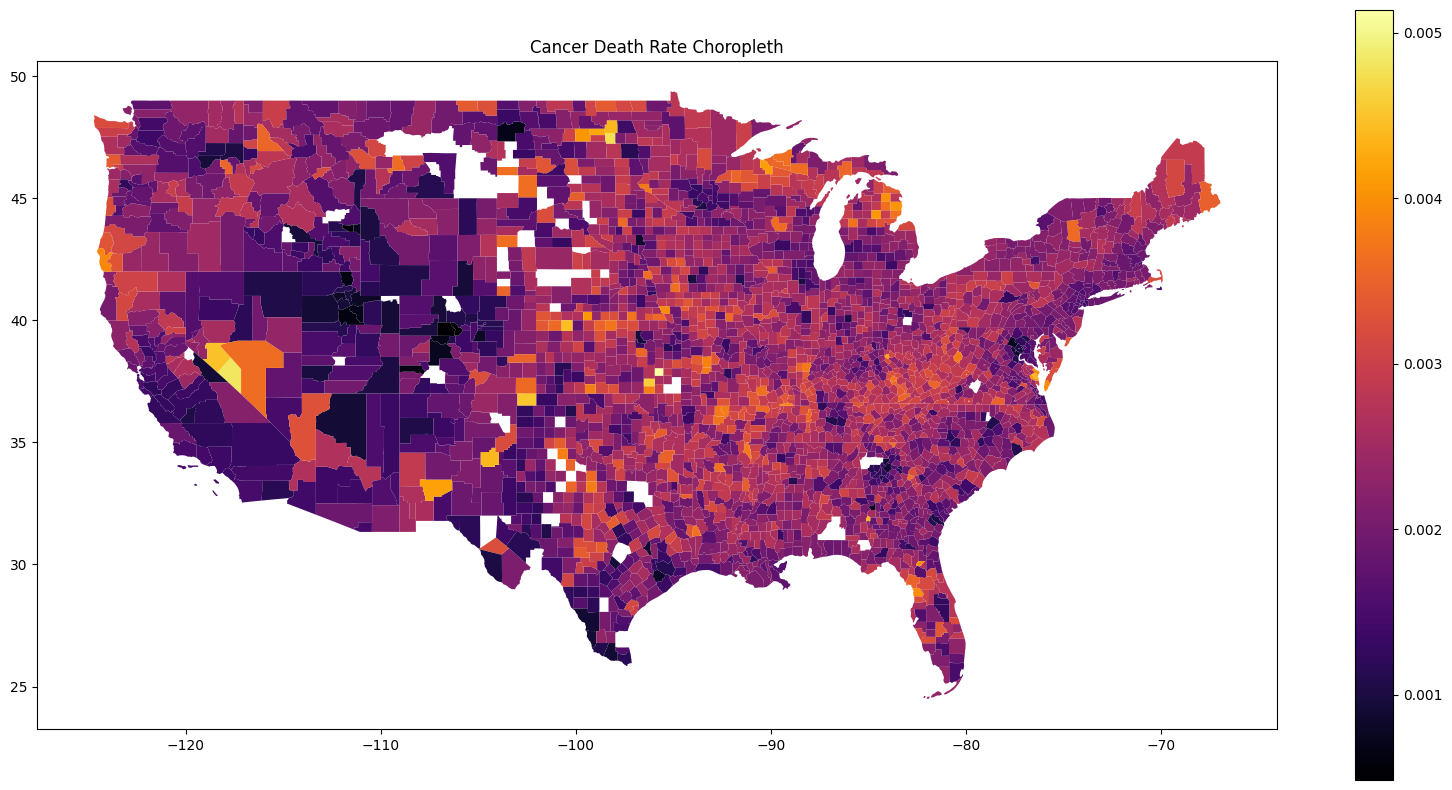

In [17]:
cancer.query("statefips not in [15,2,72]").plot(column='deathrate', legend=True, figsize=(20,10), cmap='inferno').set_title('Cancer Death Rate Choropleth')

In [18]:
numcols =  ['avganncount', 'avgdeathsperyear', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap',
       'medianage', 'medianagemale', 'medianagefemale',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'statefips',
       'countyfips', 'avghouseholdsize', 'deathrate']
cancer[numcols].corr()[['incidencerate']].sort_values(by='incidencerate', ascending=False)

,incidencerate
incidencerate,1.000000
deathrate,0.227171
pctempprivcoverage,0.149825
pcths25_over,0.121725
pctblack,0.113489
pctprivatecoveragealone,0.109278
pctprivatecoverage,0.105174
pctunemployed16_over,0.099979
pctsomecol18_24,0.077666
studypercap,0.077283


Text(0.5, 1.0, 'Incidence Rate Correlation Heatmap')

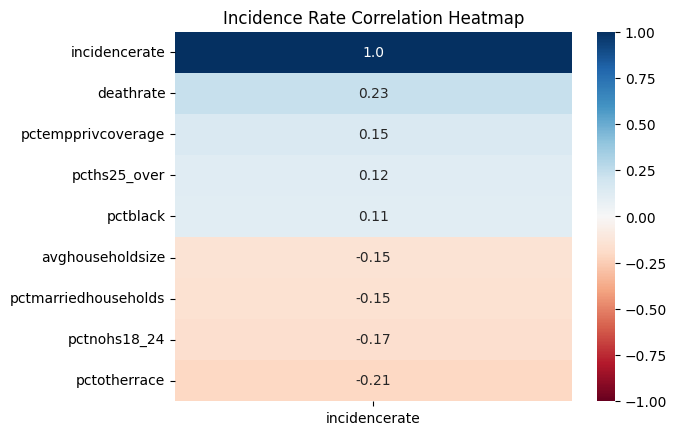

In [19]:
topcols = ['incidencerate','deathrate', 'pctotherrace', 'pctnohs18_24', 'pctmarriedhouseholds', 'pctempprivcoverage', 'avghouseholdsize', 'pcths25_over', 'pctblack']
sns.heatmap(cancer[topcols].corr().sort_values(by='incidencerate', ascending=False)[['incidencerate']], vmin=-1, vmax=1, cmap='RdBu', annot=True, fmt=f'0.2').set_title('Incidence Rate Correlation Heatmap')

Text(0.5, 0.98, 'Incidence Rate / Death Rate Simple Regression')

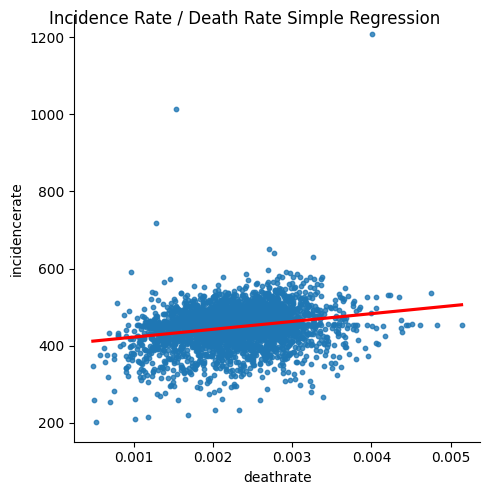

In [20]:
sns.lmplot(data=cancer, x='deathrate', y='incidencerate', scatter_kws={'s':10}, line_kws={'color': 'red'}, ci=False).fig.suptitle('Incidence Rate / Death Rate Simple Regression')

## Do Economics correlate with Death Rate?

In [21]:
binned = cancer[['binnedinc', 'popest2015', 'avgdeathsperyear']].groupby('binnedinc').sum()
binned['deathrate'] = binned['avgdeathsperyear']/binned['popest2015']

Text(0.5, 0.98, 'Average Cancer Death Rate by Income Brackets')

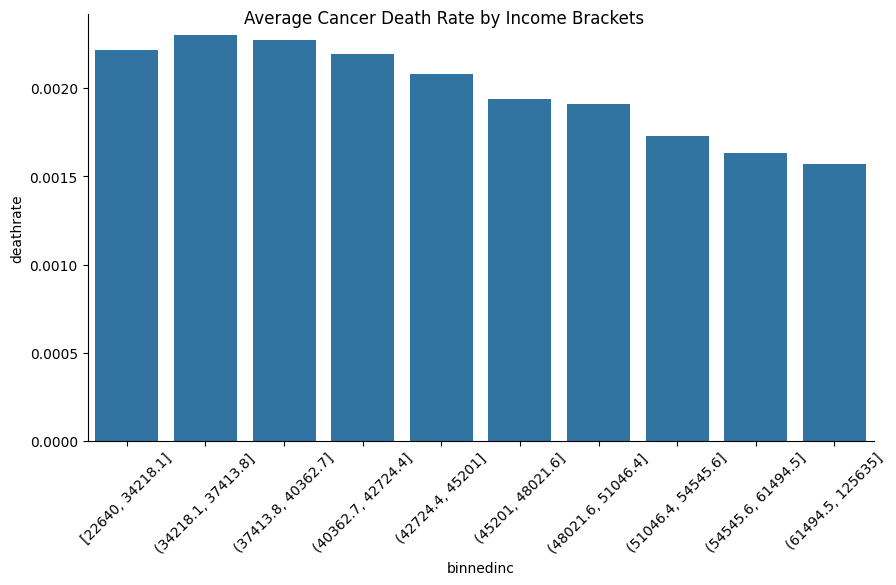

In [22]:
order = ['[22640, 34218.1]', '(34218.1, 37413.8]', '(37413.8, 40362.7]', '(40362.7, 42724.4]','(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]','(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]']
sns.catplot(binned, y='deathrate', kind='bar', x='binnedinc', order = order, aspect=16/9).tick_params(axis='x', labelrotation=45).fig.suptitle('Average Cancer Death Rate by Income Brackets')

Text(0.5, 0.98, 'Simple Regression')

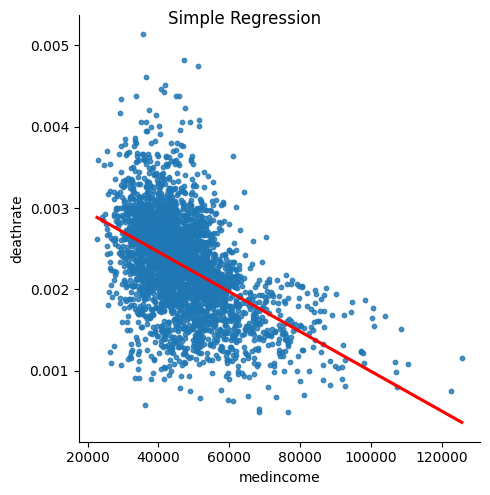

In [23]:
sns.lmplot(data=cancer, x='medincome', y='deathrate', scatter_kws={'s':10}, line_kws={'color': 'red'}, ci=False).fig.suptitle('Simple Regression')

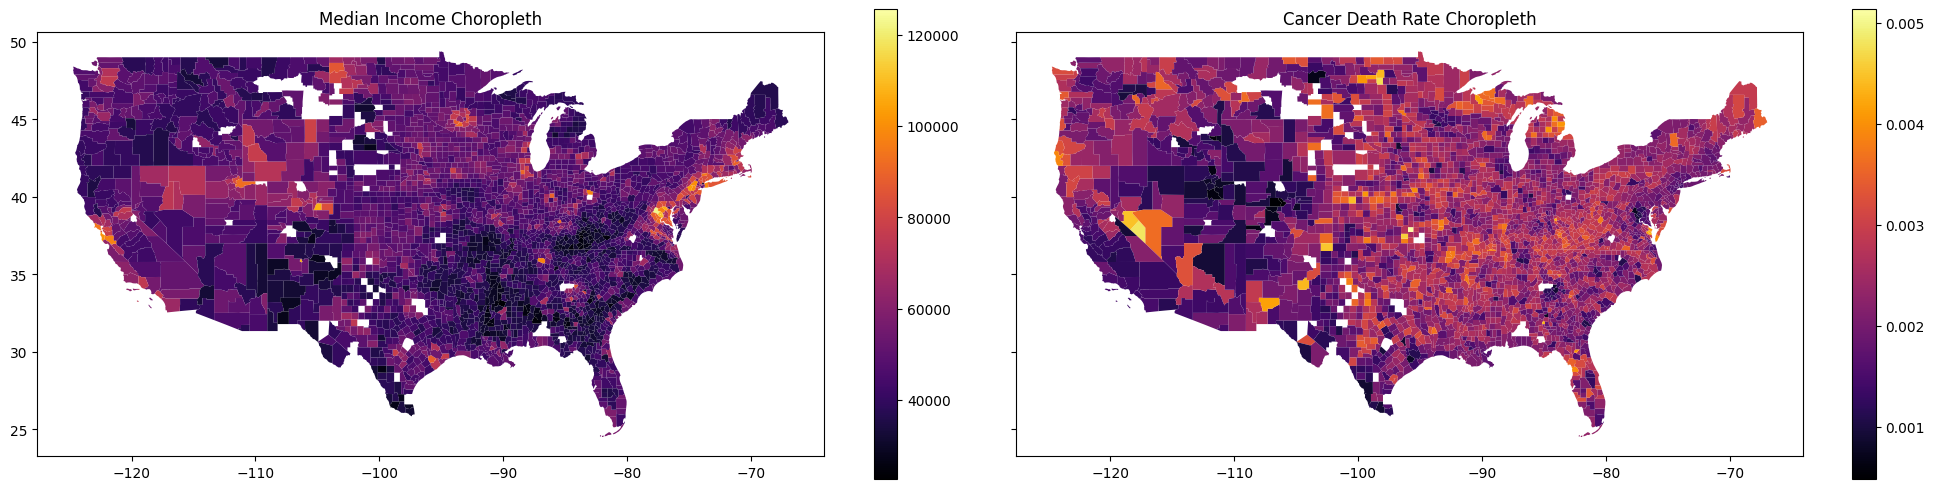

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20.2,5))

incmap = cancer.query("statefips not in [15,2,72]").plot(ax=ax1, column='medincome', legend=True, cmap='inferno')
deathmap = cancer.query("statefips not in [15,2,72]").plot(ax=ax2, column='deathrate', cmap='inferno', legend=True)

ax1.set_title('Median Income Choropleth')
ax2.set_title('Cancer Death Rate Choropleth')

plt.tight_layout()
plt.show()

In [25]:
cancer[numcols].corr()[['deathrate']].sort_values(by='deathrate', ascending=False)

,deathrate
deathrate,1.000000
medianagefemale,0.718199
medianagemale,0.669798
pctpubliccoverage,0.625699
pcths25_over,0.523673
pctpubliccoveragealone,0.315031
pcths18_24,0.257193
incidencerate,0.227171
pctwhite,0.208757
povertypercent,0.184082


Text(0.5, 1.0, 'Death Rate Correlation Heatmap')

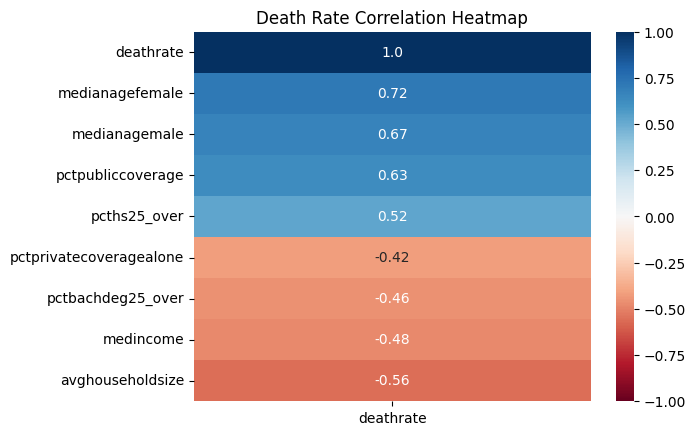

In [26]:
topcols = ['deathrate','medianagefemale', 'medianagemale', 'pctpubliccoverage', 'pcths25_over', 'medincome', 'pctbachdeg25_over', 'avghouseholdsize', 'pctprivatecoveragealone']
sns.heatmap(cancer[topcols].corr().sort_values(by='deathrate', ascending=False)[['deathrate']], vmin=-1, vmax=1, cmap='RdBu', annot=True, fmt=f'0.2').set_title('Death Rate Correlation Heatmap')

## Building Multiple Regression Models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as train_test_split

In [28]:
all_cols = ['medincome', 'povertypercent', 'pctunemployed16_over' ,'medianage', 'medianagemale', 'medianagefemale', 'percentmarried',
            'pctmarriedhouseholds', 'birthrate', 'avghouseholdsize', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over',
            'pctbachdeg25_over', 'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone',
            'pctwhite', 'pctblack', 'pctasian','pctotherrace']

In [29]:
cancer = cancer.query('incidencerate < 1000')

econ_cols = ['medincome', 'povertypercent', 'pctunemployed16_over']
age_cols = ['medianage', 'medianagemale', 'medianagefemale']
family_cols = ['percentmarried', 'pctmarriedhouseholds', 'birthrate', 'avghouseholdsize']
edu_cols = ['pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over']
insurance_cols = ['pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone']
race_cols = ['pctwhite', 'pctblack', 'pctasian','pctotherrace']

categories = {"Econ": econ_cols, "Age": age_cols, "Family": family_cols, "Education": edu_cols, "Insurance": insurance_cols, "Race": race_cols, "All": all_cols}

predictions= {}

for category in categories.keys():
    x_train, x_test, y_train, y_test = train_test_split(cancer[categories[category]], cancer[['incidencerate']], test_size=0.2, random_state=51)
    model=LinearRegression()
    model.fit(x_train, y_train)
    print(f'{category}: ', f'{model.score(x_test, y_test):0.3f}')
    predictions.update({f'{category.lower()[0:3]}prediction' : model.predict(cancer[categories[category]]).ravel()})

inc_models = pd.DataFrame(predictions, index=cancer[categories[category]].index)
inc_models = inc_models.join(cancer['incidencerate'])

for category in categories.keys():
    inc_models[f'{category.lower()[0:3]}residual'] = inc_models['incidencerate'] - inc_models[f'{category.lower()[0:3]}prediction']

Econ:  0.027
Age:  0.003
Family:  0.021
Education:  0.053
Insurance:  0.143
Race:  0.047
All:  0.220


Text(0.5, 1.0, 'Residual KDE by Category')

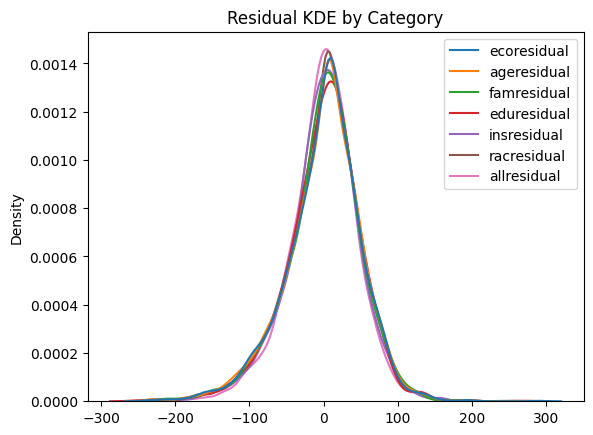

In [30]:
sns.kdeplot(inc_models[['ecoresidual', 'ageresidual', 'famresidual', 'eduresidual','insresidual', 'racresidual', 'allresidual']]).set_title("Residual KDE by Category")

In [31]:
predictions= {}

for category in categories.keys():
    x_train, x_test, y_train, y_test = train_test_split(cancer[categories[category]], cancer[['deathrate']], test_size=0.2, random_state=51)
    model=LinearRegression()
    model.fit(x_train, y_train)
    print(f'{category}: ', f'{model.score(x_test, y_test):0.3f}')
    predictions.update({f'{category.lower()[0:3]}prediction' : model.predict(cancer[categories[category]]).ravel()})

dr_models = pd.DataFrame(predictions, index=cancer[categories[category]].index)
dr_models = dr_models.join(cancer['deathrate'])

for category in categories.keys():
    dr_models[f'{category.lower()[0:3]}residual'] = dr_models['deathrate'] - dr_models[f'{category.lower()[0:3]}prediction']

Econ:  0.348
Age:  0.532
Family:  0.341
Education:  0.325
Insurance:  0.602
Race:  0.195
All:  0.733


Text(0.5, 1.0, 'Residual KDE by Category')

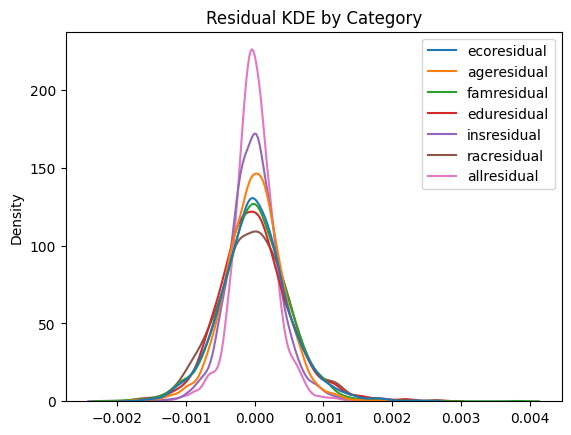

In [32]:
sns.kdeplot(dr_models[['ecoresidual', 'ageresidual', 'famresidual', 'eduresidual','insresidual', 'racresidual', 'allresidual']]).set_title("Residual KDE by Category")

## Selecting the right number of variables for the DeathRate Multiple Regression

,numFeatures,testScores,trainScores
0,1,0.521290,0.510094
1,2,0.521456,0.509197
2,3,0.521459,0.509288
3,4,0.629991,0.638008
4,5,0.665261,0.652817
5,6,0.703966,0.691643
6,7,0.709444,0.703054
7,8,0.711304,0.706013
8,9,0.711444,0.705701
9,10,0.711445,0.705587


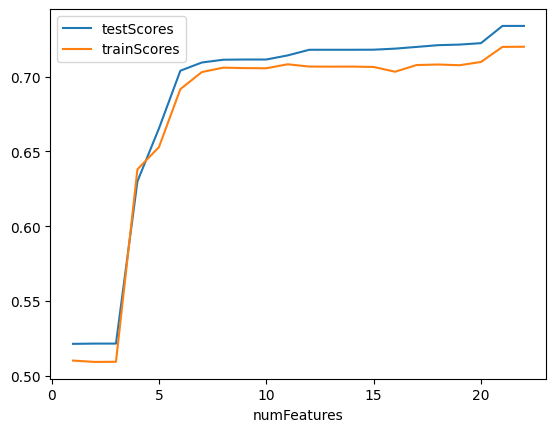

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

testScores = []
trainScores = []
for i in range(1,len(all_cols)):
    x_train, x_test, y_train, y_test = train_test_split(cancer[all_cols], cancer[['deathrate']], test_size=0.2, random_state=1)
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(cancer[all_cols], cancer[['deathrate']].values.ravel())

    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)

    model.fit(x_train_fs, y_train.values.ravel())
    testScores.append(model.score(x_train_fs, y_train))
    trainScores.append(model.score(x_test_fs, y_test))

df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df = df.reset_index()
df = df.rename(columns={'index': 'numFeatures'})
df['numFeatures'] = df['numFeatures'] + 1
df.plot(x='numFeatures', y=['testScores', 'trainScores'])

df.head(10)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(cancer[all_cols], cancer[['deathrate']], test_size=0.2, random_state=1)
fs = SelectKBest(score_func=mutual_info_regression, k=6)
fs.fit(cancer[all_cols], cancer[['deathrate']].values.ravel())
features = fs.get_feature_names_out()
print(features)

['medianage' 'medianagemale' 'medianagefemale' 'avghouseholdsize'
 'pcths25_over' 'pctpubliccoverage']


Model Score: 0.692


Text(0.5, 1.0, 'Residual KDE')

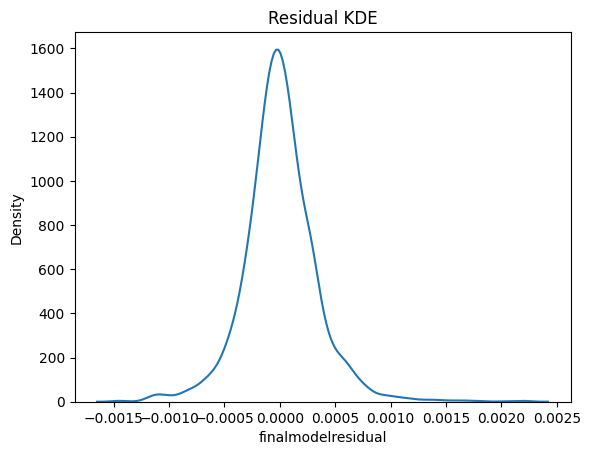

In [35]:
x_train, x_test, y_train, y_test = train_test_split(cancer[features], cancer[['deathrate']], test_size=0.2, random_state=1)
model=LinearRegression()
model.fit(x_train, y_train)
print('Model Score:', f'{model.score(x_test, y_test):0.3f}')
predictions.update({'finalmodelprediction' : model.predict(cancer[features]).ravel()})

final = pd.DataFrame(predictions, index=cancer[features].index)
final = final.join(cancer[['deathrate', 'geometry', "statefips"]])


final['finalmodelresidual'] = final['deathrate'] - final['finalmodelprediction']

sns.kdeplot(final['finalmodelresidual']).set_title("Residual KDE")

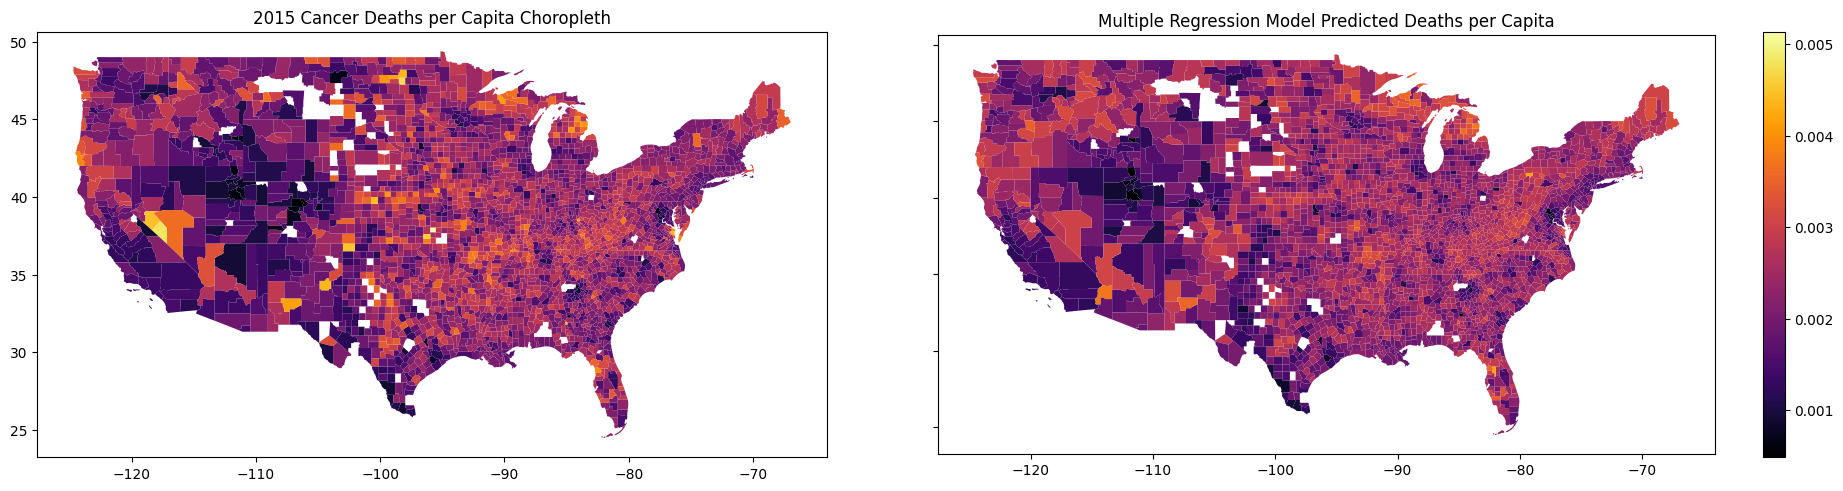

In [36]:
final = geo.GeoDataFrame(final, geometry='geometry')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20.2,5))
predmap = final.query("statefips not in [15,2,72]").plot(ax=ax2, column='finalmodelprediction', cmap='inferno', vmin=0.000485, vmax=0.005136, legend=True)
actmap = cancer.query("statefips not in [15,2,72]").plot(ax=ax1, column='deathrate', cmap='inferno', vmin=0.000485, vmax=0.005136)

ax1.set_title('2015 Cancer Deaths per Capita Choropleth')
ax2.set_title('Multiple Regression Model Predicted Deaths per Capita')

plt.tight_layout()
plt.show()